<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [12]:
#imports
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('./data/amazon_data.csv')

In [11]:
#reviews.text
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [75]:
df.describe(exclude='number')

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,review_tokens
count,28332,28332,28332,28332,28332,28332,28332,28332,28332,28332,...,28332,28332,9,16086,28332,28332,28332,28332,28332,28332
unique,65,55,52,65,65,3,60,9,65,65,...,1313,606,2,2,9906,18168,10441,16269,65,17006
top,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazon,"AA,AAA,Health,Electronics,Health & Household,C...",Electronics,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-01-23T00:00:00.000Z,2017-08-28T00:00:00Z,True,True,https://www.amazon.com/product-reviews/B00QWO9...,good,Five Stars,ByAmazon Customer,"https://www.barcodable.com/upc/841710106442,ht...",[good]
freq,8343,8343,8343,8343,8343,16153,8343,13995,8343,8343,...,532,8343,8,15353,12071,60,3937,889,8343,181


In [73]:
df['reviews.text'][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

In [13]:
# tokenize
#STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [15]:
df['review_tokens'] = df['reviews.text'].apply(lambda x: tokenize(x))
df['review_tokens'].head()

0    [order, item, bad, quality, missing, backup, s...
1               [bulk, expensive, way, products, like]
2                             [duracell, price, happy]
3              [work, brand, batteries, better, price]
4             [batteries, long, lasting, price, great]
Name: review_tokens, dtype: object

In [17]:
# create a dictionary representing all of the words in our corpus
id2word = corpora.Dictionary(df['review_tokens'])

In [18]:
id2word.token2id['duracell']

16

In [19]:
id2word.doc2bow(tokenize("These Duracell batteries have a good price"))

[(16, 1), (18, 1), (19, 1), (35, 1)]

In [25]:
# remove extreme values 
id2word.filter_extremes(no_below=10, no_above=0.75)

In [26]:
# BOW representation of corpus
corpus = [id2word.doc2bow(text) for text in df['review_tokens']]

In [27]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

## Interpret the LDA

In [28]:
lda.print_topics()

[(0,
  '0.056*"battery" + 0.032*"life" + 0.017*"things" + 0.016*"time" + 0.016*"quickly" + 0.015*"money" + 0.014*"going" + 0.014*"bad" + 0.012*"got" + 0.012*"need"'),
 (1,
  '0.155*"long" + 0.055*"price" + 0.050*"batteries" + 0.044*"great" + 0.037*"good" + 0.036*"time" + 0.033*"brands" + 0.031*"battery" + 0.023*"lasting" + 0.018*"brand"'),
 (2,
  '0.149*"batteries" + 0.024*"brand" + 0.023*"work" + 0.021*"amazon" + 0.017*"good" + 0.014*"like" + 0.013*"battery" + 0.013*"duracell" + 0.013*"use" + 0.012*"long"'),
 (3,
  '0.048*"kids" + 0.047*"case" + 0.018*"bought" + 0.018*"purchase" + 0.017*"keeps" + 0.016*"children" + 0.014*"hours" + 0.012*"durable" + 0.012*"comes" + 0.012*"day"'),
 (4,
  '0.119*"tablet" + 0.066*"use" + 0.061*"easy" + 0.027*"size" + 0.025*"perfect" + 0.024*"great" + 0.024*"screen" + 0.016*"nice" + 0.012*"internet" + 0.012*"games"'),
 (5,
  '0.029*"kindle" + 0.024*"light" + 0.013*"buy" + 0.012*"best" + 0.012*"amazon" + 0.009*"weight" + 0.009*"like" + 0.008*"use" + 0.008*"

In [52]:
help(lda33)

Help on LdaMulticore in module gensim.models.ldamulticore object:

class LdaMulticore(gensim.models.ldamodel.LdaModel)
 |  LdaMulticore(corpus=None, num_topics=100, id2word=None, workers=None, chunksize=2000, passes=1, batch=False, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, random_state=None, minimum_probability=0.01, minimum_phi_value=0.01, per_word_topics=False, dtype=<class 'numpy.float32'>)
 |  
 |  The constructor estimates Latent Dirichlet Allocation model parameters based
 |  on a training corpus:
 |  
 |  >>> lda = LdaMulticore(corpus, num_topics=10)
 |  
 |  You can then infer topic distributions on new, unseen documents, with
 |  
 |  >>> doc_lda = lda[doc_bow]
 |  
 |  The model can be updated (trained) with new documents via
 |  
 |  >>> lda.update(other_corpus)
 |  
 |  Model persistency is achieved through its `load`/`save` methods.
 |  
 |  Method resolution order:
 |      LdaMulticore
 |      gensim.models.ld

In [29]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

In [31]:
for t in topics:
    print(t)
    print("\n")

battery life things time quickly


long price batteries great good


batteries brand work amazon good


kids case bought purchase keeps


tablet use easy size perfect


kindle light buy best amazon


tablet kids apps easy use


good great work far deal


tablet amazon good great screen


great price product good buy


amazon year buy best tablet


kindle like ipad love screen


loves gift bought christmas daughter


books read games reading love


old year tablet bought loves




In [32]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

/Users/stephensinclair/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [33]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/stephensinclair/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.225517 -0.107035       1        1  14.435975
8     -0.002808  0.004030       2        1   9.823198
6     -0.176356  0.077181       3        1   9.616570
5     -0.005724 -0.177834       4        1   7.972018
9      0.171774  0.239140       5        1   7.011667
4     -0.171254  0.082292       6        1   6.977723
14    -0.207349  0.013087       7        1   6.743195
11    -0.065010 -0.155981       8        1   6.436330
13    -0.152216  0.036515       9        1   5.415621
12    -0.155609  0.109832      10        1   4.977600
1      0.303666  0.041972      11        1   4.384665
0      0.101549 -0.214117      12        1   4.234844
7      0.187794  0.185843      13        1   4.043916
10     0.024473 -0.111805      14        1   4.034563
3     -0.078447 -0.023120      15        1   3.892126, topic_info=     Category         Freq       Term        Total  loglift  logprob
17    Default  7457.000000  batteries  7457.000000  30.0000  30.0000
20    Default  8986.000000      great  8986.000000  29.0000  29.0000
33    Default  5687.000000       good  5687.000000  28.0000  28.0000
16    Default  4844.000000      price  4844.000000  27.0000  27.0000
22    Default  2578.000000       long  2578.000000  26.0000  26.0000
1831  Default  6718.000000     tablet  6718.000000  25.0000  25.0000
8     Default  2216.000000       work  2216.000000  24.0000  24.0000
1496  Default  2195.000000      loves  2195.000000  23.0000  23.0000
1633  Default  1520.000000      books  1520.000000  22.0000  22.0000
481   Default  2081.000000        old  2081.000000  21.0000  21.0000
185   Default  2482.000000       kids  2482.000000  20.0000  20.0000
158   Default  2036.000000    product  2036.000000  19.0000  19.0000
1627  Default  3113.000000     kindle  3113.000000  18.0000  18.0000
785   Default  1102.000000       gift  1102.000000  17.0000  17.0000
27    Default  3156.000000     bought  3156.000000  16.0000  16.0000
2     Default  2195.000000    battery  2195.000000  15.0000  15.0000
679   Default  2831.000000       easy  2831.000000  14.0000  14.0000
101   Default  1779.000000       year  1779.000000  13.0000  13.0000
23    Default  3908.000000     amazon  3908.000000  12.0000  12.0000
1286  Default  1776.000000       apps  1776.000000  11.0000  11.0000
594   Default  1727.000000      games  1727.000000  10.0000  10.0000
706   Default  1256.000000       read  1256.000000   9.0000   9.0000
30    Default   905.000000  christmas   905.000000   8.0000   8.0000
188   Default  1249.000000        far  1249.000000   7.0000   7.0000
19    Default  1275.000000      brand  1275.000000   6.0000   6.0000
73    Default   850.000000     brands   850.000000   5.0000   5.0000
267   Default   863.000000       case   863.000000   4.0000   4.0000
832   Default  1226.000000    reading  1226.000000   3.0000   3.0000
90    Default  4333.000000        use  4333.000000   2.0000   2.0000
400   Default   817.000000       deal   817.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1171  Topic15    88.869644   returned   131.585861   2.8537  -4.8752
843   Topic15   112.118164      young   175.214081   2.7998  -4.6428
1163  Topic15    45.079178    younger    63.260735   2.9074  -5.5539
152   Topic15   112.463615  satisfied   192.869293   2.7068  -4.6397
1922  Topic15    62.138248    setting    98.825089   2.7822  -5.2330
209   Topic15   160.243256      hours   339.853180   2.4944  -4.2857
1065  Topic15    39.251774    program    58.122101   2.8537  -5.6924
1112  Topic15   188.725311   children   456.772369   2.3623  -4.1221
1403  Topic15    63.514584     sturdy   112.372208   2.6757  -5.2111
80    Topic15    51.122612  purchases    85.486115   2.7321  -5.4281
622   Topic15   140.777817    durable   351.746277   2.3305  -4.4152
185   Topic15   558.053223       kids  2482.530273   1.7536  -3.0379
442

## Select appropriate number of topics

In [38]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=df['review_tokens'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [41]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

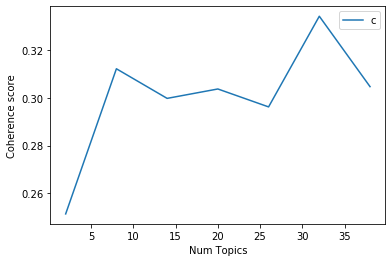

In [43]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [44]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        start=25, 
                                                        limit=35, 
                                                        step=1)

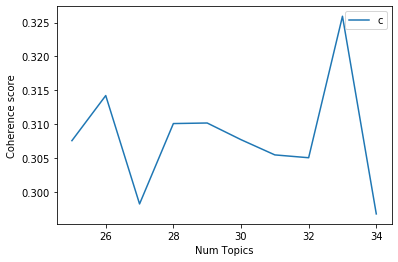

In [45]:
limit=35; start=25; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [46]:
lda33 = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 33,
                   passes=100,
                   workers=4
                  )

In [56]:
lda9 = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 9,
                   passes=100,
                   workers=4
                  )

In [57]:
lda9.print_topics()

[(0,
  '0.114*"love" + 0.048*"best" + 0.034*"buy" + 0.033*"kindle" + 0.032*"kids" + 0.026*"things" + 0.018*"worth" + 0.017*"need" + 0.016*"money" + 0.016*"got"'),
 (1,
  '0.149*"batteries" + 0.050*"long" + 0.048*"price" + 0.043*"good" + 0.037*"work" + 0.031*"brand" + 0.031*"great" + 0.022*"brands" + 0.021*"quality" + 0.020*"amazon"'),
 (2,
  '0.057*"battery" + 0.036*"life" + 0.034*"like" + 0.026*"charge" + 0.026*"better" + 0.024*"kindle" + 0.023*"far" + 0.022*"long" + 0.015*"new" + 0.014*"bought"'),
 (3,
  '0.073*"bought" + 0.049*"gift" + 0.048*"loves" + 0.041*"christmas" + 0.034*"tablet" + 0.030*"purchased" + 0.024*"got" + 0.021*"happy" + 0.020*"wife" + 0.018*"loved"'),
 (4,
  '0.041*"use" + 0.040*"kindle" + 0.039*"easy" + 0.029*"books" + 0.028*"read" + 0.027*"tablet" + 0.027*"reading" + 0.025*"screen" + 0.018*"size" + 0.016*"great"'),
 (5,
  '0.036*"batteries" + 0.020*"amazon" + 0.015*"like" + 0.015*"use" + 0.011*"box" + 0.010*"ve" + 0.008*"battery" + 0.007*"work" + 0.007*"remote" + 

In [55]:
lda33.print_topics(num_topics=-1)

[(0,
  '0.049*"times" + 0.040*"know" + 0.034*"problem" + 0.032*"charging" + 0.026*"hard" + 0.023*"dropped" + 0.021*"time" + 0.021*"charger" + 0.017*"thing" + 0.017*"gets"'),
 (1,
  '0.173*"long" + 0.131*"batteries" + 0.066*"brand" + 0.055*"brands" + 0.043*"price" + 0.033*"time" + 0.030*"work" + 0.029*"buy" + 0.024*"cheap" + 0.024*"lasting"'),
 (2,
  '0.318*"like" + 0.041*"issues" + 0.030*"carry" + 0.029*"job" + 0.027*"ease" + 0.026*"ve" + 0.023*"far" + 0.022*"feel" + 0.019*"thought" + 0.017*"enjoyed"'),
 (3,
  '0.117*"happy" + 0.097*"purchase" + 0.061*"charge" + 0.040*"mom" + 0.037*"bought" + 0.029*"phone" + 0.025*"hold" + 0.025*"couldn" + 0.024*"takes" + 0.021*"time"'),
 (4,
  '0.258*"easy" + 0.257*"use" + 0.254*"tablet" + 0.036*"perfect" + 0.024*"set" + 0.014*"simple" + 0.011*"looking" + 0.008*"features" + 0.007*"affordable" + 0.006*"needed"'),
 (5,
  '0.037*"batteries" + 0.020*"amazon" + 0.020*"battery" + 0.015*"amazonbasics" + 0.014*"alkaline" + 0.014*"use" + 0.013*"high" + 0.013*"

In [53]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda33.print_topics(num_topics=-1)]
topics = [' '.join(t[0:5]) for t in words]

In [58]:
words9 = [re.findall(r'"([^"]*)"',t[1]) for t in lda9.print_topics(num_topics=-1)]
topics9 = [' '.join(t[0:5]) for t in words9]

In [59]:
for t in topics9:
    print(t)
    print("\n")

love best buy kindle kids


batteries long price good work


battery life like charge better


bought gift loves christmas tablet


use kindle easy books read


batteries amazon like use box


tablet old kids year games


great good price product works


tablet amazon great good price




In [54]:
for t in topics:
    print(t)
    print("\n")

times know problem charging hard


long batteries brand brands price


like issues carry job ease


happy purchase charge mom bought


easy use tablet perfect set


batteries amazon battery amazonbasics alkaline


tablet child set kid friendly


love kids tablets bought warranty


sound alexa music tap echo


nice fast item super thanks


amazon products basic basics expensive


kindle read books reading book


gift christmas bought grandson loved


value free money amazon age


little needs pleased problems slow


device ok use ads samsung


screen size light small right


tablet amazon apps google store


great price works product value


highly going sale looking quickly


battery life worth longer lasts


kindle reader color cover light


case comes working school protective


ipad wanted internet bought wifi


batteries work use box ve


recommend awesome product enjoy definitely


better work fine expected older


kindle new bought hd wife


buy best deal money service


games pl

In [60]:
# first item in the corpus
lda9[corpus[0]]

[(0, 0.011111226),
 (1, 0.28272253),
 (2, 0.011118529),
 (3, 0.119648635),
 (4, 0.011112025),
 (5, 0.5309436),
 (6, 0.011111111),
 (7, 0.011112308),
 (8, 0.0111201)]

In [61]:
len(corpus)

28332

In [64]:
# entire distribution for all documents in the corpus
distro = [lda9[d] for d in corpus]

In [65]:
distro[0]

[(0, 0.011111227),
 (1, 0.28268462),
 (2, 0.01111853),
 (3, 0.119647),
 (4, 0.011112027),
 (5, 0.5309831),
 (6, 0.011111112),
 (7, 0.01111231),
 (8, 0.0111201)]

In [80]:
def update(doc):
    d_dist = {k:0 for k in range(0,9)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

In [81]:
new_distro = [update(d) for d in distro]

In [82]:
# love best buy kindle kids


# batteries long price good work


# battery life like charge better


# bought gift loves christmas tablet


# use kindle easy books read


# batteries amazon like use box


# tablet old kids year games


# great good price product works


# tablet amazon great good price

topics_summary = ['kids love kindle', 'good batteries/price', 'better battery life', 'christmas tablet', 'kindle easy to use', 'batteries box', 'tablet kids games', 'works/good price', 'great tablet']

In [83]:
doc_df = pd.DataFrame.from_records(new_distro)
doc_df.columns = topics_summary
#doc_df['name'] = df['name']
doc_df.head()

,kids love kindle,good batteries/price,better battery life,christmas tablet,kindle easy to use,batteries box,tablet kids games,works/good price,great tablet
0,0.011111,0.282685,0.011119,0.119647,0.011112,0.530983,0.011111,0.011112,0.011120
1,0.018520,0.392131,0.478197,0.018522,0.018522,0.018541,0.018521,0.018519,0.018528
2,0.027778,0.580975,0.027786,0.224536,0.027782,0.027780,0.027778,0.027802,0.027783
3,0.018519,0.851829,0.018525,0.018519,0.018519,0.018520,0.018519,0.018529,0.018522
4,0.018519,0.851813,0.018520,0.018519,0.018520,0.018519,0.018521,0.018548,0.018523


In [84]:
doc_df['name'] = df['name']

In [87]:
doc_df['name'].unique()

array(['AmazonBasics AAA Performance Alkaline Batteries (36 Count)',
       'AmazonBasics Nylon CD/DVD Binder (400 Capacity)',
       'Amazon Echo ‚Äì White', 'Amazon Echo Show - Black',
       'Echo Spot Pair Kit (Black)',
       'Fire TV Stick Streaming Media Player Pair Kit',
       'AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary',
       'AmazonBasics Ventilated Adjustable Laptop Stand',
       'AmazonBasics Backpack for Laptops up to 17-inches',
       'AmazonBasics 11.6-Inch Laptop Sleeve',
       'AmazonBasics 15.6-Inch Laptop and Tablet Bag',
       'AmazonBasics External Hard Drive Case',
       'Expanding Accordion File Folder Plastic Portable Document Organizer Letter Size',
       'Cat Litter Box Covered Tray Kitten Extra Large Enclosed Hooded Hidden Toilet',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Kindle PowerFast International Charging Kit (for accelerated chargin

In [90]:
doc_df.groupby(['name']).mean()

,kids love kindle,good batteries/price,better battery life,christmas tablet,kindle easy to use,batteries box,tablet kids games,works/good price,great tablet
name,,,,,,,,,
"All-New Fire 7 Tablet with Alexa, 7"" Display, 8 GB - Marine Blue",0.084381,0.038018,0.047533,0.159617,0.137872,0.043860,0.219759,0.097433,0.161771
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case",0.088828,0.021532,0.055232,0.113600,0.062155,0.045856,0.446929,0.059805,0.090871
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case",0.093742,0.020475,0.051262,0.132447,0.056096,0.047544,0.449082,0.057610,0.077961
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",0.073162,0.030979,0.063964,0.145507,0.222426,0.034862,0.124759,0.093814,0.198341
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers",0.075766,0.030126,0.079990,0.131065,0.238743,0.062859,0.113177,0.072948,0.180882
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",0.071545,0.026406,0.070992,0.137028,0.242514,0.033426,0.108407,0.095473,0.200249
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue",0.061271,0.031005,0.067592,0.135832,0.291393,0.031429,0.081058,0.104936,0.186070
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black",0.075857,0.030789,0.065947,0.116681,0.309601,0.037729,0.104160,0.065508,0.175488
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue",0.073759,0.034269,0.072739,0.132202,0.289009,0.031028,0.108170,0.072411,0.168983


## Mean coherance 

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(doc_stream(path))
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=3)

topic_coherence = pd.DataFrame.from_records(coherence_values)

import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling